# Map Projection

Author: Fangzheng Lyu

Map projections are mathematical models used to transform the curved Earth's surface onto a flat, two-dimensional plane. They are necessary because representing a three-dimensional spherical shape on a flat surface inevitably introduces some form of distortion. Different map projections are designed to preserve or minimize distortion of specific properties like area, shape, distance, or direction, depending on the intended application and geographic region.

In [30]:
import geopandas as gpd
from matplotlib import pyplot as plt
import csv
from urllib.request import urlopen
import pandas as pd
from pyproj import Proj, transform
import math
from shapely.geometry import Point

## Notebook Outline
- [Commonly Used Map Projection](#map)
    - [North American Datum 1983 NAD83](#nad83)
    - [World Geodetic System WGS84](#wgs84)
    - [Web Mercator projection](#web)
    - [International Terrestrial Reference System](#int)
- [Transfer between different map projection](#transfer)
    - [Polygon](#poly)
    - [Point](#point)

<a id='map'></a>

## 1. Commonly Used Map Projection

This section includes commonly used map projection including North American Datum 1983, World Geodetic System WGS84, Web Mercator projection, and International Terrestrial Reference System.

Please refer to [EPSG.io: Coordinate Systems Worldwide](https://epsg.io/) for more information on the web projections

<a id='nad83'></a>

### 1.1. North American Datum 1983 NAD83

EPSG code 4269 (NAD83) is a geographic coordinate system used for mapping locations in North America. NAD83 stands for the North American Datum 1983, which is a geodetic reference system that defines the shape and size of the Earth based on measurements taken across North America.

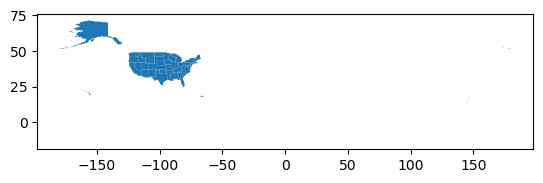

In [3]:
## Data retrieval from US census bureau
## Get the states ID
url_states = r'https://www2.census.gov/geo/tiger/TIGER2019/STATE/tl_2019_us_state.zip'
states = gpd.read_file(url_states)
states.plot()
plt.show()

In [4]:
states['geometry'].head()

0    POLYGON ((-81.74725 39.09538, -81.74635 39.096...
1    MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ...
2    POLYGON ((-91.18529 40.63780, -91.17510 40.643...
3    POLYGON ((-96.78438 46.63050, -96.78434 46.630...
4    POLYGON ((-77.45881 39.22027, -77.45866 39.220...
Name: geometry, dtype: geometry

In [5]:
states.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

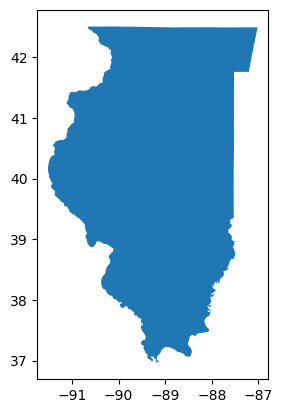

In [6]:
## look into the shape for states Illinois
states[states["GEOID"] == "17"].plot()

<a id='wgs84'></a>

### 1.2. World Geodetic System WGS84

The World Geodetic System 1984 (WGS 84) is a standard for defining geographic coordinate systems used in cartography, geodesy, and navigation. It is the reference coordinate system used by the Global Positioning System (GPS).

### Difference Between WGS84 and NAD83
Both NAD 83 and WGS 84 are based on the GRS 80 spheroid. But WGS 84 subsequently changed to a slightly less flattened spheroid. This change in flattening is about 0.1 mm, a difference so small that computational programs often do not distinguish between the two ellipsoids.However, due to differences in how the reference ellipsoids are centered and oriented, coordinates in the two datums differ from each other by amounts on the order of a meter over much of the United States.

In [21]:
state_world = states.to_crs(epsg=4326)

In [22]:
state_world['geometry'].head()

0    POLYGON ((-81.74725 39.09538, -81.74635 39.096...
1    MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ...
2    POLYGON ((-91.18529 40.63780, -91.17510 40.643...
3    POLYGON ((-96.78438 46.63050, -96.78434 46.630...
4    POLYGON ((-77.45881 39.22027, -77.45866 39.220...
Name: geometry, dtype: geometry

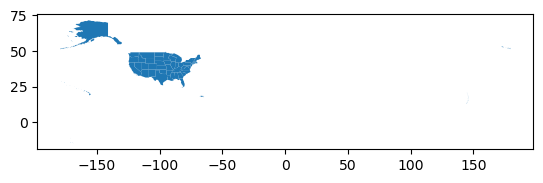

In [24]:
state_world.plot()
plt.show()

<Axes: >

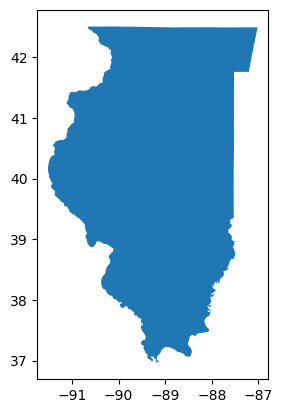

In [25]:
## look into the shape for states Illinois
state_world[state_world["GEOID"] == "17"].plot()

<a id='web'></a>

### 1.3. Web Mercator projection

Web Mercator projection is a variant of the Mercator map projection and is the standard for Web mapping applications such as Google Map.

In [12]:
state_web = states.to_crs(epsg=3857)

In [13]:
state_web['geometry'].head()

0    POLYGON ((-9100062.689 4735343.019, -9099962.5...
1    MULTIPOLYGON (((-9616740.083 3631993.459, -961...
2    POLYGON ((-10150700.607 4959063.588, -10149565...
3    POLYGON ((-10773988.010 5881970.094, -10773983...
4    POLYGON ((-8622675.064 4753272.653, -8622658.7...
Name: geometry, dtype: geometry

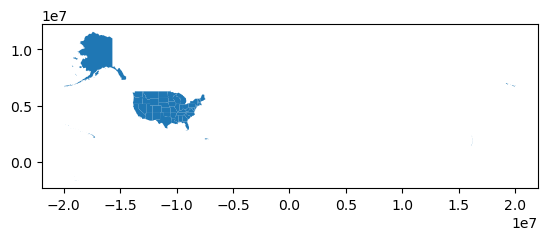

In [23]:
state_web.plot()
plt.show()

<Axes: >

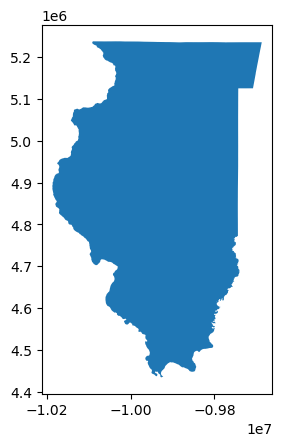

In [15]:
## look into the shape for states Illinois
state_web[state_web["GEOID"] == "17"].plot()

<a id='int'></a>

### 1.4. International Terrestrial Reference System

The International Terrestrial Reference System (ITRS) describes procedures for creating reference frames suitable for use with measurements on or near the Earth's surface. This is done in much the same way that a physical standard might be described as a set of procedures for creating a realization of that standard.

In [16]:
state_int = states.to_crs(epsg=7789)

In [17]:
state_int['geometry'].head()

0    POLYGON ((711478.78496 -4905328.23254, 711543....
1    MULTIPOLYGON (((344692.30443 -5461456.82892, 3...
2    POLYGON ((-100261.77226 -4845845.87166, -99391...
3    POLYGON ((-518326.07954 -4356914.80204, -51832...
4    POLYGON ((1074394.52716 -4829845.34833, 107440...
Name: geometry, dtype: geometry

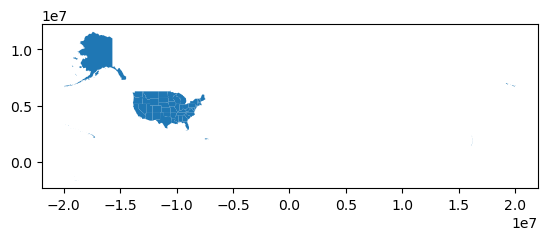

In [18]:
## Data retrieval from US census bureau
## Get the states ID
state_web.plot()
plt.show()

In [ ]:
## look into the shape for states Illinois
state_web[state_web["GEOID"] == "17"].plot()

<a id='transfer'></a>

## 2. Transfer between different map projection

<a id='poly'></a>

### 2.1. Polygon

### From WGS 84 to Web Mercator

In [28]:
chicago = states[states["GEOID"] == "17"]
chicago

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143779863817,6215723896,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."


In [29]:
chicago['geometry']

2    POLYGON ((-91.18529 40.63780, -91.17510 40.643...
Name: geometry, dtype: geometry

In [31]:
chicago_web = chicago.to_crs(epsg=3857)
chicago_web

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143779863817,6215723896,+40.1028754,-089.1526108,"POLYGON ((-10150700.607 4959063.588, -10149565..."


In [32]:
chicago_web['geometry']

2    POLYGON ((-10150700.607 4959063.588, -10149565...
Name: geometry, dtype: geometry

<a id='point'></a>

### 2.2. Point

### From WGS 84 to Web Mercator

Look at UIUC

In [35]:
inProj = Proj('epsg:4326')  
outProj = Proj('epsg:3857') 

In [38]:
x,y = 40.110558, -88.228333
x_web, ymin_web = transform(inProj,outProj,x,y)

/tmp/ipykernel_330/3009123953.py:2: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x_web, ymin_web = transform(inProj,outProj,x,y)


In [39]:
x_web, ymin_web

(-9821533.103099376, 4882021.297250526)